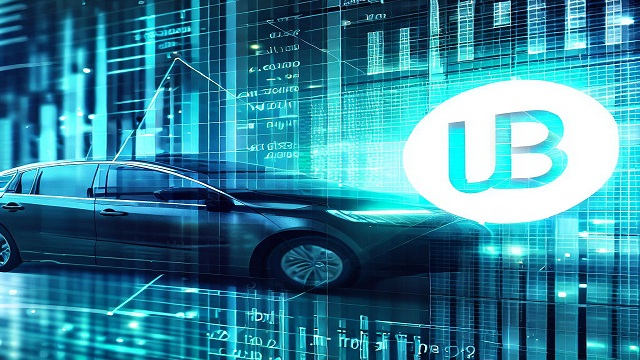

### 0.SUMMARY

This code analyzes Uber travel data in New York to identify demand patterns. The code collects and analyzes Uber travel data, such as pickup and drop-off locations, dates, and fares. The goal is to identify demand patterns that can be used to improve the efficiency of the Uber system.

The code is likely to perform the following steps:

- Collect Uber travel data from a data source 'uber.csv'.
- Clean and prepare the data for analysis.
- Identify demand patterns in the data.
- Visualize the demand patterns to make them easier to understand.
- Analyze the demand patterns to identify ways to improve the efficiency of the Uber system.

The specific analysis that the code performs will depend on the specific demand patterns that the user is interested in identifying. For example, the code could be used to identify:

- The busiest times of day and days of the week for Uber travel in New York.
- The most popular pickup and drop-off locations in New York.
- The factors that influence Uber fares in New York (e.g., time of day, distance traveled, etc.).

By identifying these demand patterns, the code can help Uber to improve its service like deploying more drivers in areas where demand is high and setting fares that are competitive and reflect the true cost of providing service. Overall, this code is a great tool for understanding and improving the Uber system in New York.

### 1.DATA LOAD

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime
import calendar
import folium
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") # Configuring styles

In [2]:
#load data
df = pd.read_csv('uber.csv')
print('---------------------')
print('UBER Dataset Preview:')
print('---------------------')
df.head(3)

---------------------
UBER Dataset Preview:
---------------------


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


### 2.DATA REVIEW, CLEANING AND PREPARATION

2.1 Data Review

In [3]:
#data review
print('----------------')
print('Data Information')
print('----------------')
df.info()

----------------
Data Information
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


2.2 Data Cleaning

In [4]:
print('--------------------------')
print('Percentage of Missing Data')
print('--------------------------')
100 * df.isnull().sum() / len(df)

--------------------------
Percentage of Missing Data
--------------------------


Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [5]:
#identify the row with the missing data in the "dropoff_longitude" column
df[df['dropoff_longitude'].isnull()]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [6]:
#only one row has missing values on "dropoff_longitude" and "dropoff_latitude" columns 
#drop row where is missing data 
df = df.dropna(axis=0,subset='dropoff_longitude')
print('-----------------------------------------------')
print('Rows with missing data was removed successfully')
print('-----------------------------------------------')
print('Percentage of Missing Data')
print('--------------------------')
100 * df.isnull().sum() / len(df)

-----------------------------------------------
Rows with missing data was removed successfully
-----------------------------------------------
Percentage of Missing Data
--------------------------


Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [7]:
#the "key" column will be removed because it has no meaningful information for the analysis
df = df.drop("key",axis=1)
print('--------------------------------')
print('Colum "key" removed successfully')
print('--------------------------------')

--------------------------------
Colum "key" removed successfully
--------------------------------


In [8]:
#negative amount in the fare_amount column:
neg_amount = len(df[df['fare_amount'] < 0])
print('--------------------------------------------')
print('{} negative values in the fare_amount column'.format(neg_amount))
print('--------------------------------------------')

#convert fare negative values to positive 
df['fare_amount'] = df['fare_amount'].abs()
print('------------------------------------------------------')
print('The negatives fare values has been updated to positive')
print('------------------------------------------------------')

--------------------------------------------
17 negative values in the fare_amount column
--------------------------------------------
------------------------------------------------------
The negatives fare values has been updated to positive
------------------------------------------------------


In [9]:
#fare amount less than $1
lees_1 = len(df[df['fare_amount'] < 1])
print('--------------------------------------------')
print('{} fare amount less than $1'.format(lees_1))
print('--------------------------------------------')

#drop the rows with fare amount less than $1
df = df[df['fare_amount'] > 1]
print('-------------------------------------------------------')
print('Rows with fare amount less than $1 removed successfully')
print('-------------------------------------------------------')

--------------------------------------------
8 fare amount less than $1
--------------------------------------------
-------------------------------------------------------
Rows with fare amount less than $1 removed successfully
-------------------------------------------------------


In [10]:
#Trip records with 0 passengers
pass_0 = len(df[df['passenger_count']==0])
print('-----------------------------------')
print('{} Trip records with 0 passengers'.format(pass_0))
print('-----------------------------------')

#All trips recorded with 0 passengers are assumed to equal 1 passenger
df['passenger_count'] = df['passenger_count'].replace(0, 1)
print('----------------------------------------------------------')
print('Trips recorded with 0 passengers updated to 1 successfully')
print('----------------------------------------------------------')


-----------------------------------
708 Trip records with 0 passengers
-----------------------------------
----------------------------------------------------------
Trips recorded with 0 passengers updated to 1 successfully
----------------------------------------------------------


In [11]:
#New York City coordinates
print('-------------------------------------------------------------')
print('Only coordinates within the blue rectangle will be considered')
print('-------------------------------------------------------------')
map_coor = folium.Map(location=[40.7127837, -74.0059413], zoom_start=10)
coor_marker_1 = folium.Marker(location=[40.5076,-74.2557], popup='40.5076, -74.2557')
map_coor.add_child(coor_marker_1)
coor_marker_2 = folium.Marker(location=[40.5076,-73.7004], popup='40.5076, -73.7004')
map_coor.add_child(coor_marker_2)
coor_marker_3 = folium.Marker(location=[40.9153,-74.2557], popup='40.9153, -74.2557')
map_coor.add_child(coor_marker_3)
coor_marker_4 = folium.Marker(location=[40.9153,-73.7004], popup='40.9153, -73.7004')
map_coor.add_child(coor_marker_4)
map_coor.options['scrollWheelZoom'] = False
line = folium.PolyLine(locations=[[40.5076,-74.2557], [40.5076,-73.7004]], color='blue')
map_coor.add_child(line)
line = folium.PolyLine(locations=[[40.5076,-74.2557], [40.9153,-74.2557]], color='blue')
map_coor.add_child(line)
line = folium.PolyLine(locations=[[40.9153,-73.7004], [40.9153,-74.2557]], color='blue')
map_coor.add_child(line)
line = folium.PolyLine(locations=[[40.9153,-73.7004], [40.5076,-73.7004]], color='blue')
map_coor.add_child(line)

-------------------------------------------------------------
Only coordinates within the blue rectangle will be considered
-------------------------------------------------------------


In [12]:
#check inconsistent latitude and longitude values
print('latitude and longitude with inconsistent values')
print('-----------------------------------------------')
print('pickup_longitude inconsistent values:', len(df[df['pickup_longitude']<-74.2557])+len(df[df['pickup_longitude']>-73.7004]))
print('pickup_latitude inconsistent values:', len(df[df['pickup_latitude']>40.9153])+len(df[df['pickup_latitude']<40.5076]))
print('dropoff_longitude inconsistent values:', len(df[df['dropoff_longitude']<-74.2557])+len(df[df['dropoff_longitude']>-73.7004]))
print('dropoff_latitude inconsistent values:', len(df[df['dropoff_latitude']>40.9153])+len(df[df['dropoff_latitude']<40.5076]))

latitude and longitude with inconsistent values
-----------------------------------------------
pickup_longitude inconsistent values: 4098
pickup_latitude inconsistent values: 4066
dropoff_longitude inconsistent values: 4111
dropoff_latitude inconsistent values: 4089


In [13]:
#Drop the inconsistent latitude and longitude values 
df = df[df['pickup_longitude'] >= -74.2557]
df = df[df['pickup_longitude'] <= -73.7004]

df = df[df['pickup_latitude'] <= 40.9153]
df = df[df['pickup_latitude'] >= 40.5076]

df = df[df['dropoff_longitude'] >= -74.2557]
df = df[df['dropoff_longitude'] <= -73.7004]

df = df[df['dropoff_latitude'] <= 40.9153]
df = df[df['dropoff_latitude'] >= 40.5076]
print('-------------------------------------------------')
print('Rows with inconsistent value removed successfully')
print('-------------------------------------------------')

-------------------------------------------------
Rows with inconsistent value removed successfully
-------------------------------------------------


2.3 Data Preparation

In [14]:
#for analysis, the "pickup_datetime" column must be changed to DATETIME format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z').dt.tz_convert(None)
print('------------------------------------')
print('Datetime format applied successfully')
print('------------------------------------')

------------------------------------
Datetime format applied successfully
------------------------------------


In [15]:
#add additional columns with hour, day, day of week and month information for analysis
hour=[]
day=[]
weekday=[]
month=[]
for x in df['pickup_datetime']:
    hour.append(x.hour)
    day.append(x.day)
    weekday.append(calendar.day_name[x.dayofweek])
    month.append(x.month)    
df['hour']=hour
df['day']=day
df['weekday']=weekday
df['month']=month
print('---------------------------------------------------------------')
print('new hour, day, day of week and month columns added successfully')
print('---------------------------------------------------------------')

---------------------------------------------------------------
new hour, day, day of week and month columns added successfully
---------------------------------------------------------------


In [16]:
#adding season colum
#define set_season function
def get_season(month):
    if month == 12 or month <=2:
        season='winter'
    elif month<=5:
        season='spring'
    elif month<=8:
        season='summer' 
    else:
        season='autum'
    return season
#creation season colum
season=[]
for x in df['month']:
    season.append(get_season(x))
df['season']=season
print('----------------------------------')
print('season column created successfully')
print('----------------------------------')

----------------------------------
season column created successfully
----------------------------------


In [17]:
##create a new pickup and dropoff columns with the coordinates pairs
df['pickup_location'] = df.apply(lambda row: (row['pickup_latitude'], row['pickup_longitude']), axis=1)
df['dropoff_location'] = df.apply(lambda row: (row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
print('-----------------------------------------------------------------')
print('pickup_location and dropoff_location columns created successfully')
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
pickup_location and dropoff_location columns created successfully
-----------------------------------------------------------------


In [18]:
#create the distance traveled for each trip
df['distance_km'] = df.apply(lambda row: round(haversine(row['pickup_location'], row['dropoff_location']), 3), axis=1)
print('---------------------------------------')
print('distance_km column created successfully')
print('---------------------------------------')

---------------------------------------
distance_km column created successfully
---------------------------------------


In [19]:
#only distances traveled greater than 100 m (0.1 km) are significant for the analysis
print('{} records with distances traveled less than 100 m (0.1 km)'.format(len(df[df['distance_km']<0.1])))

3105 records with distances traveled less than 100 m (0.1 km)


In [20]:
df = df[df['distance_km'] >= 0.1]
print('--------------------------------------------------------------------------')
print('Rows with distances traveled less than 100 m (0.1 km) removed successfully')
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Rows with distances traveled less than 100 m (0.1 km) removed successfully
--------------------------------------------------------------------------


### 3.DATA ANALYSIS

#### 3.1 Descriptive statistics

##### - What is the average fare amount for a Uber trip?

In [21]:
average_fare = round(df['fare_amount'].mean(),2)
print('-------------------------------------------')
print('The average fare for a Uber trip is: ${}'.format(average_fare))
print('-------------------------------------------')

-------------------------------------------
The average fare for a Uber trip is: $11.28
-------------------------------------------


##### - What is the median fare amount for a Uber trip?


In [22]:
mean_fare = np.median(df['fare_amount'])
print('--------------------------------------')
print('The mean fare for a Uber trip is: ${}'.format(mean_fare))
print('--------------------------------------')

--------------------------------------
The mean fare for a Uber trip is: $8.5
--------------------------------------


##### - What is the distribution of fare amounts for Uber trips?

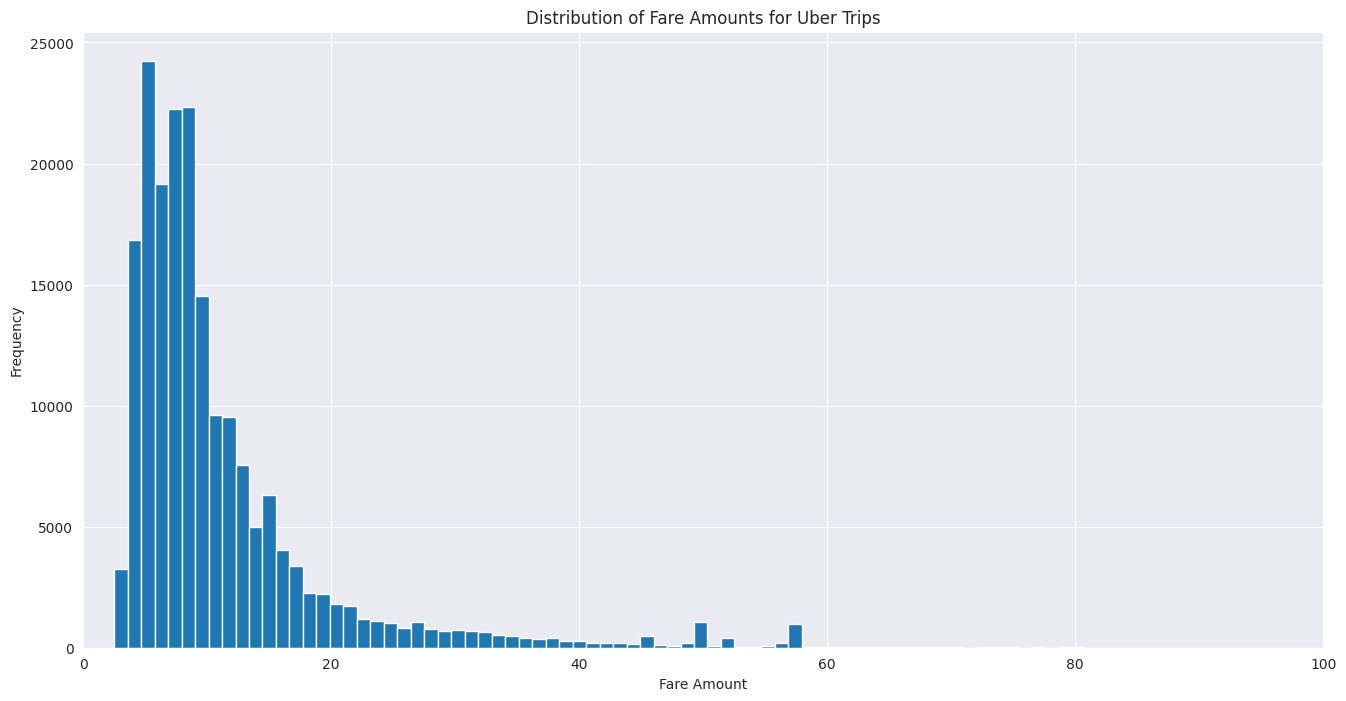

In [23]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(16,8))
plt.hist(df['fare_amount'], bins=200)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts for Uber Trips')
plt.xlim(0,100)
plt.show();

##### - What is the relationship between fare amount and time of day?

/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


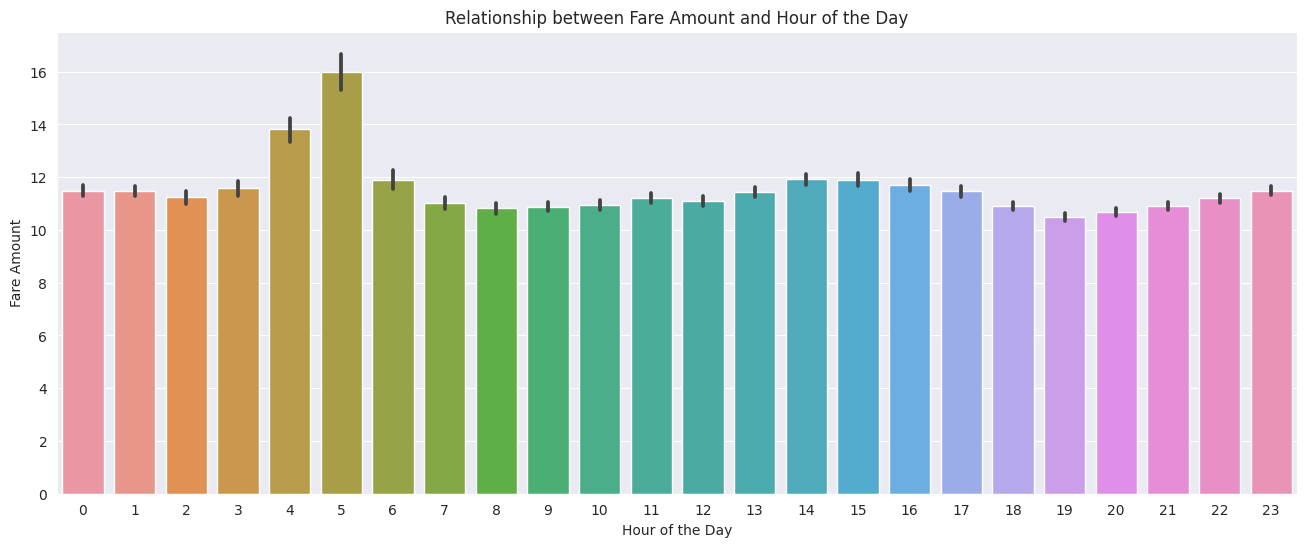

In [24]:
# Bar plot
plt.figure(figsize=(16,6))
sns.barplot(x='hour', y='fare_amount', data=df)
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')
plt.title('Relationship between Fare Amount and Hour of the Day')
plt.show();

##### - How does the fare amount vary by passenger count?

/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


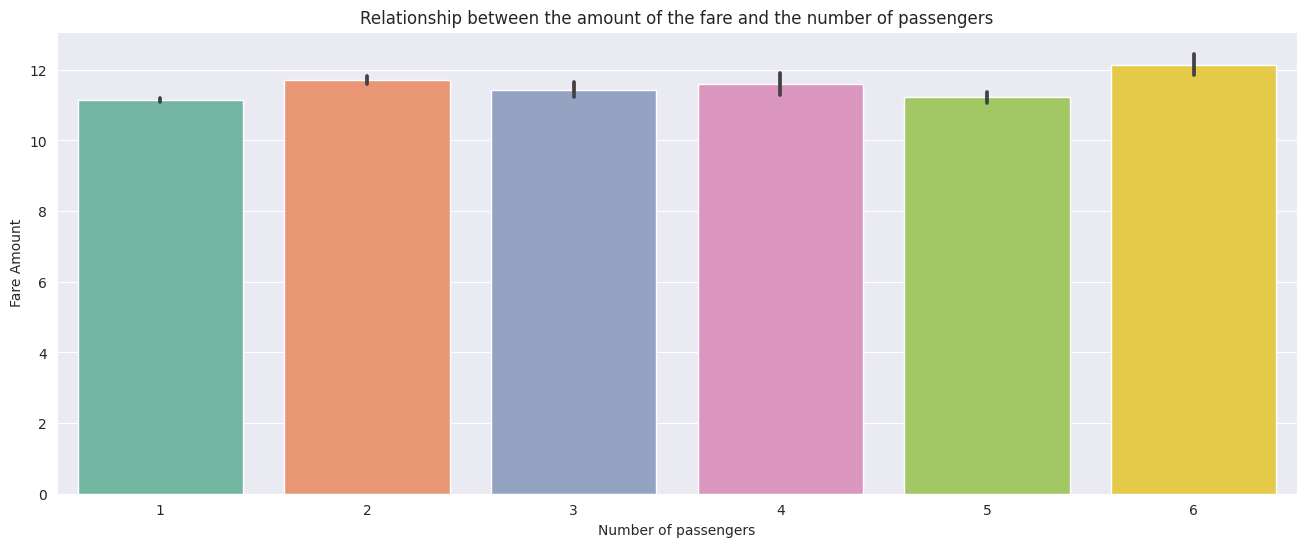

In [25]:
# Bar plot
plt.figure(figsize=(16,6))
sns.barplot(x='passenger_count', y='fare_amount', data=df, palette='Set2')
plt.xlabel('Number of passengers')
plt.ylabel('Fare Amount')
plt.title('Relationship between the amount of the fare and the number of passengers')
plt.show();

##### - What is the relationship between fare amount and trip distance?

/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


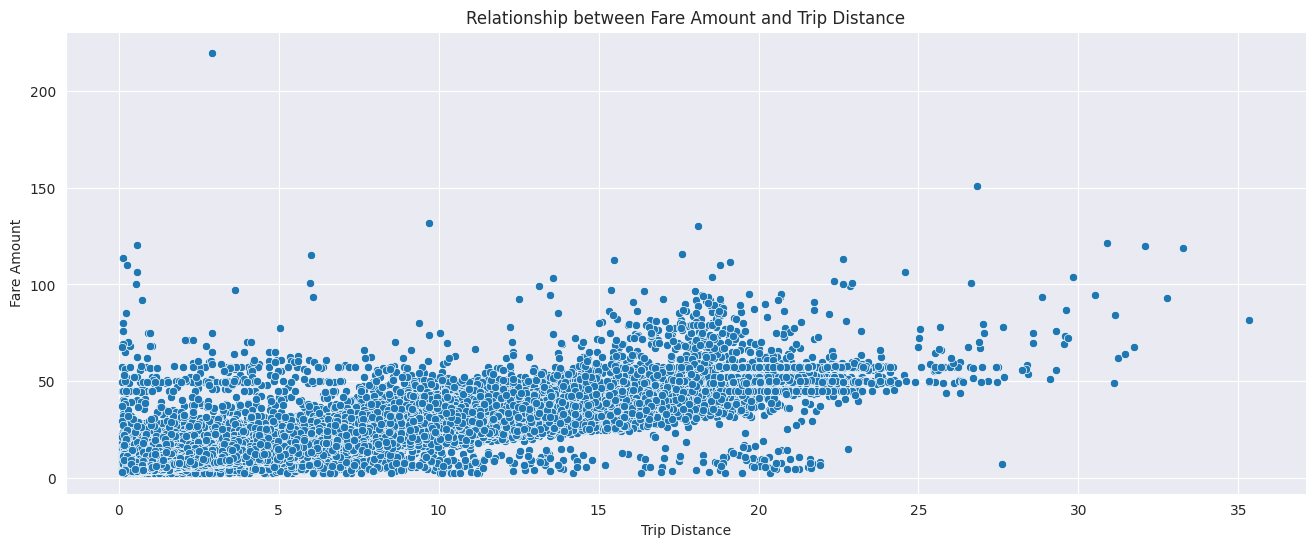

In [26]:
# Scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Relationship between Fare Amount and Trip Distance')
plt.show();

##### - What is the frequency of use with respect to the number of passengers?

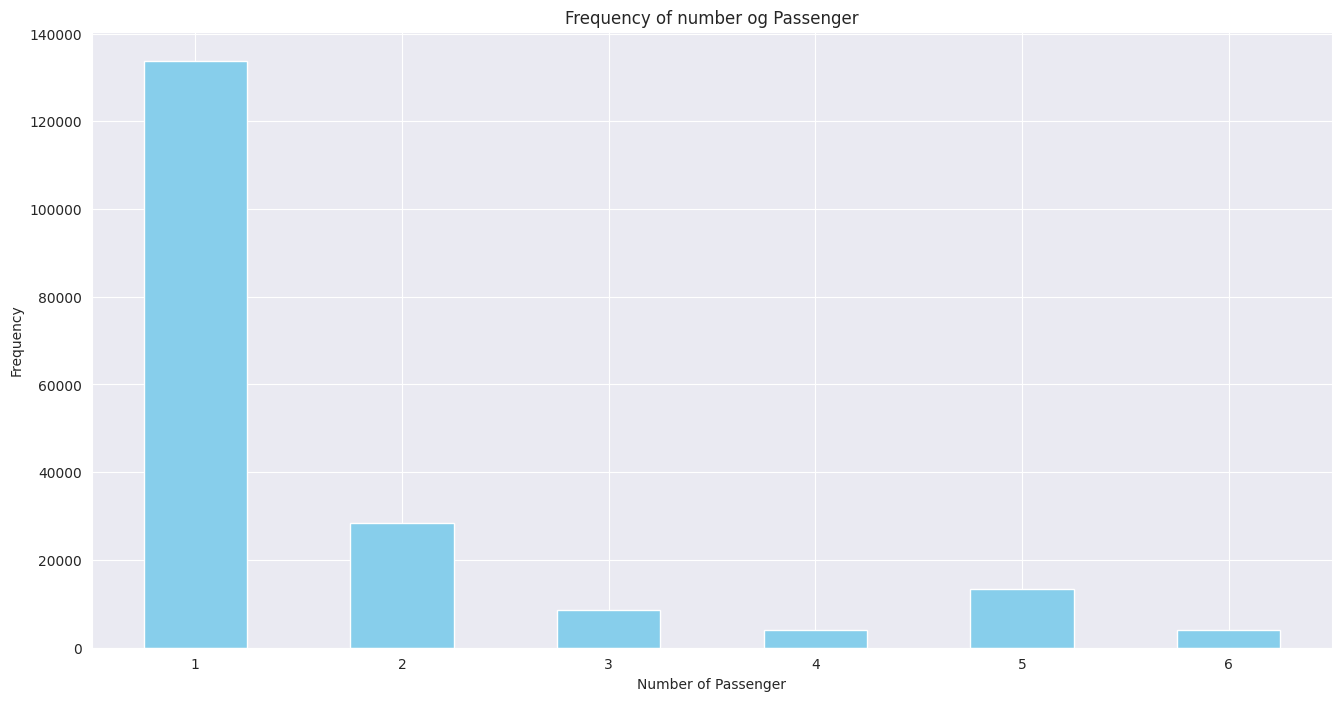

In [27]:
# Plot a histogram to visualize the distribution
passenger = (df['passenger_count'].value_counts()).sort_index()
plt.figure(figsize=(16,8))
passenger.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Passenger')
plt.ylabel('Frequency')
plt.title('Frequency of number og Passenger')
plt.xticks(rotation=0)
plt.show();

#### 3.2 Geospatial analysis

##### - Where are the most popular Uber pickup and dropoff locations?

In [28]:
print('-------------------------------------')
print('The 3 most popular pickup coordinates')
print('-------------------------------------')

#pickup locations coordinates counts
pickup_loc_counts = df['pickup_location'].value_counts()
#drawing the map
map = folium.Map(location=[40.751462, -73.959624], zoom_start=14)
map.options['scrollWheelZoom'] = False
for i in range(0,3):
    marker = folium.Marker(location=[pickup_loc_counts.index[i][0],pickup_loc_counts.index[i][1]], popup=pickup_loc_counts.index[i])
    map.add_child(marker)
map

-------------------------------------
The 3 most popular pickup coordinates
-------------------------------------


In [29]:
print('--------------------------------------')
print('The 3 most popular dropoff coordinates')
print('--------------------------------------')

#pickup locations coordinates counts
dropoff_loc_counts = df['dropoff_location'].value_counts()
#drawing the map
map = folium.Map(location=[40.696472, -73.888918], zoom_start=12)
map.options['scrollWheelZoom'] = False
for i in range(0,3):
    marker = folium.Marker(location=[dropoff_loc_counts.index[i][0],dropoff_loc_counts.index[i][1]], popup=dropoff_loc_counts.index[i])
    map.add_child(marker)
map

--------------------------------------
The 3 most popular dropoff coordinates
--------------------------------------


##### - What is the distribution of the distance traveled by Uber?

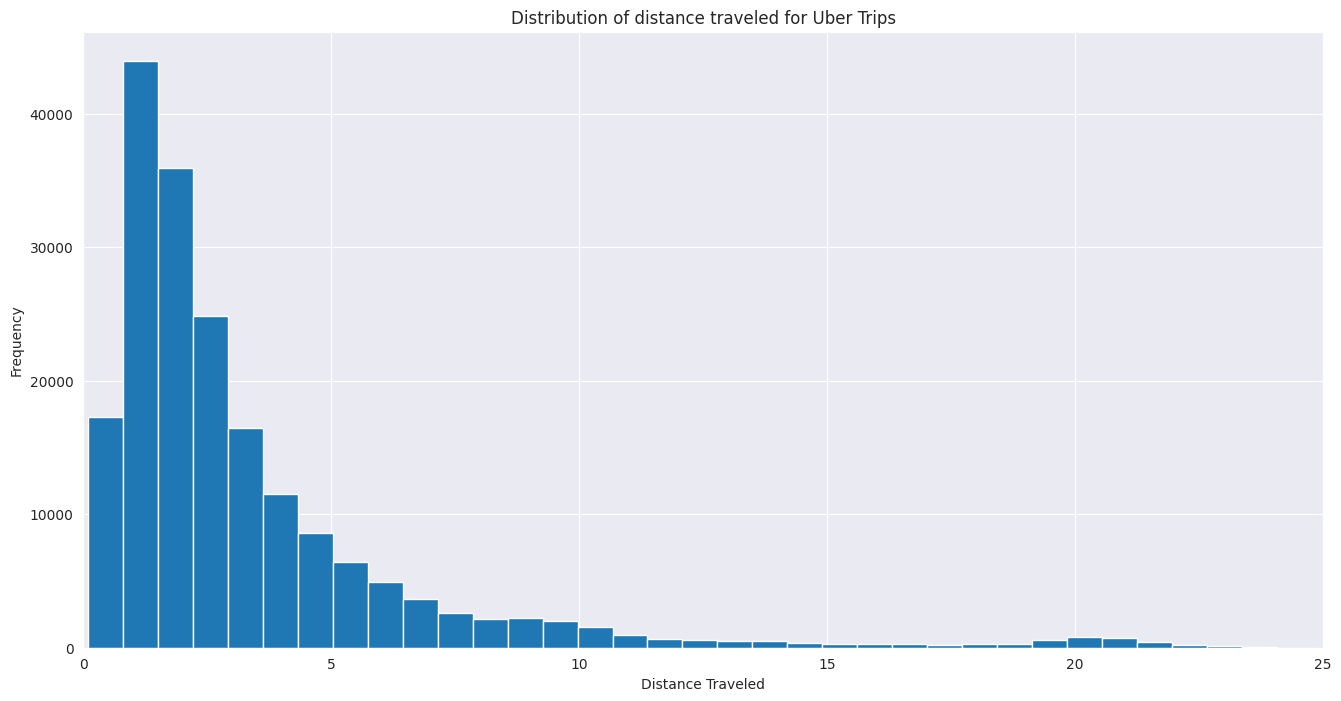

In [30]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(16,8))
plt.hist(df['distance_km'], bins=50)
plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')
plt.title('Distribution of distance traveled for Uber Trips')
plt.xlim(0,25)
plt.show();

##### - What is the longest distance traveled?

In [31]:
#Longest distance traveled
max_distance = df['distance_km'].max()
print('-------------------------------------------')
print('The longest distance traveled is: {} Km'.format(max_distance))
print('-------------------------------------------')

pickup_max_dis = df['pickup_location'][df.sort_values('distance_km',ascending=False).index[0]]
dropoff_max_dis = df['dropoff_location'][df.sort_values('distance_km',ascending=False).index[0]]

#drawing the map
map = folium.Map(location=[40.642483, -74.081225], zoom_start=11)
map.options['scrollWheelZoom'] = False
marker = folium.Marker(location=[pickup_max_dis[0],pickup_max_dis[1]], popup='pickup')
map.add_child(marker)
marker = folium.Marker(location=[dropoff_max_dis[0],dropoff_max_dis[1]], popup='dropoff')
map.add_child(marker)
line = folium.PolyLine(locations=[[pickup_max_dis[0],pickup_max_dis[1]], [dropoff_max_dis[0],dropoff_max_dis[1]]], color='blue')
map.add_child(line)
map

-------------------------------------------
The longest distance traveled is: 35.342 Km
-------------------------------------------


##### - What is average trip distance? 

In [48]:
print('-------------------------------------')
print('The average trip distance is: {} Km'.format(round(df['distance_km'].mean(),2)))
print('-------------------------------------')

-------------------------------------
The average trip distance is: 3.36 Km
-------------------------------------


#### 3.3 Time analysis

##### - What is the distribution of Uber demand hours?

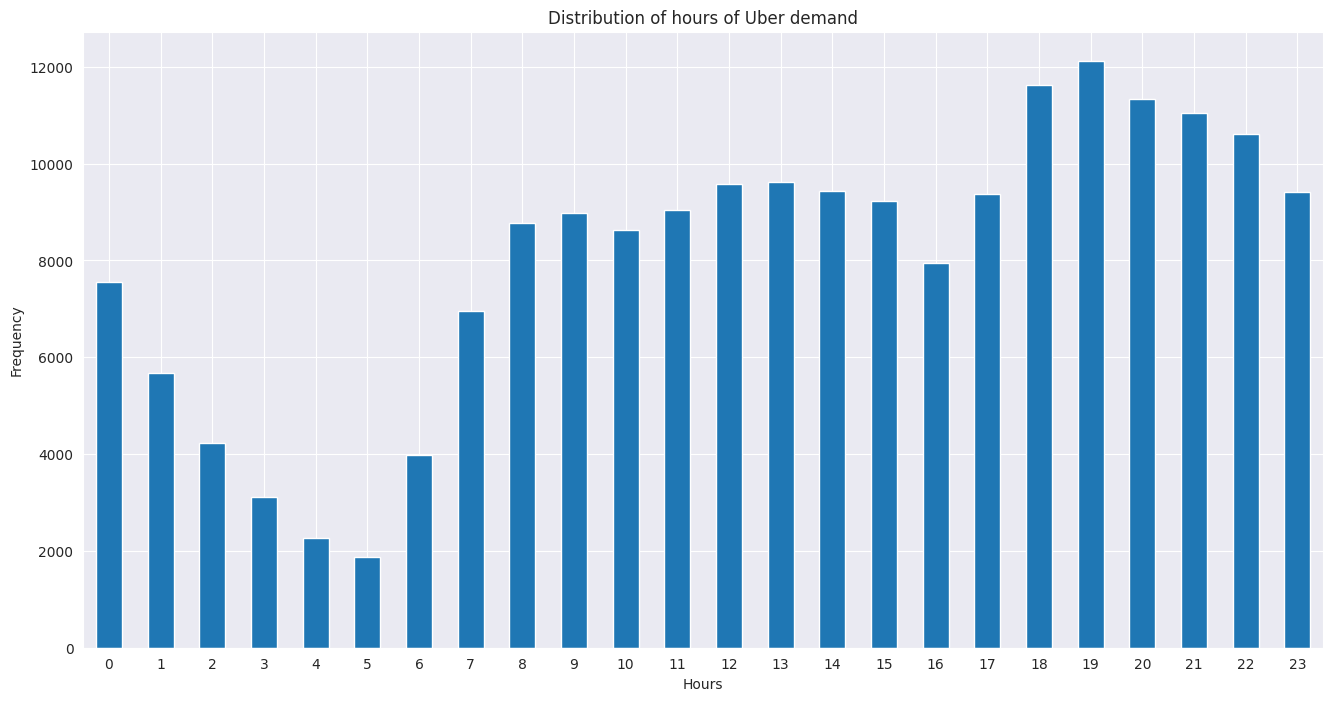

In [32]:
# Plot a histogram to visualize the distribution
hours = (df['hour'].value_counts()).sort_index()
plt.figure(figsize=(16,8))
hours.plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of hours of Uber demand')
plt.xticks(rotation=0)
plt.show();

##### - How do Uber travel patterns vary by day of the week?

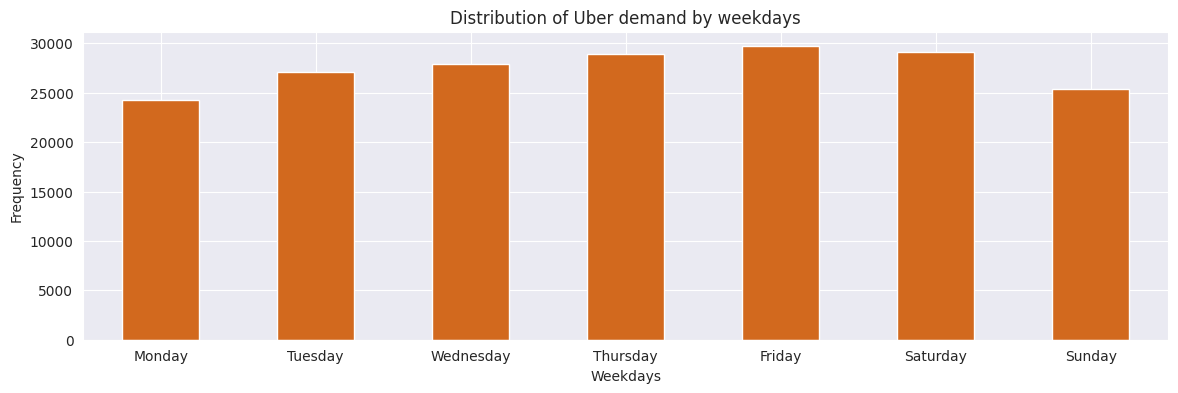

In [33]:
# Plot a histogram to visualize the distribution
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = (df['weekday'].value_counts()).reindex(weekday_order)

plt.figure(figsize=(14,4))
weekday_counts.plot(kind='bar', color='chocolate')
plt.xlabel('Weekdays')
plt.ylabel('Frequency')
plt.title('Distribution of Uber demand by weekdays')
plt.xticks(rotation=0)
plt.show();

##### - How do Uber travel patterns vary by month?

/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


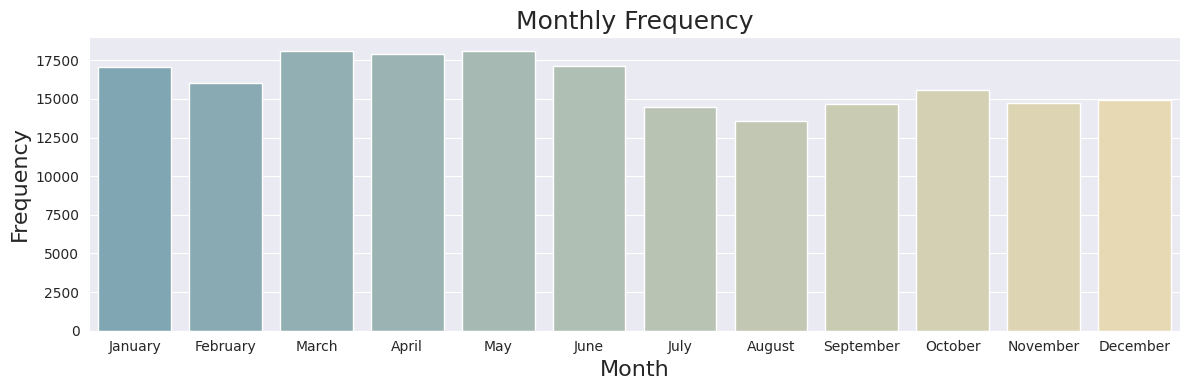

In [34]:
# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
# Convert the month numbers to month names
df["month_name"] = df["month"].apply(lambda x: month_names[x])
#Get the frequency of each month
month_counts = df["month_name"].value_counts()
#Re-order by month name
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(month_order)

# Create a bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=month_counts.index, y=month_counts.values, data=df, palette='blend:#7AB,#EDA')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Monthly Frequency", fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### - How do Uber travel patterns vary by season?


/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


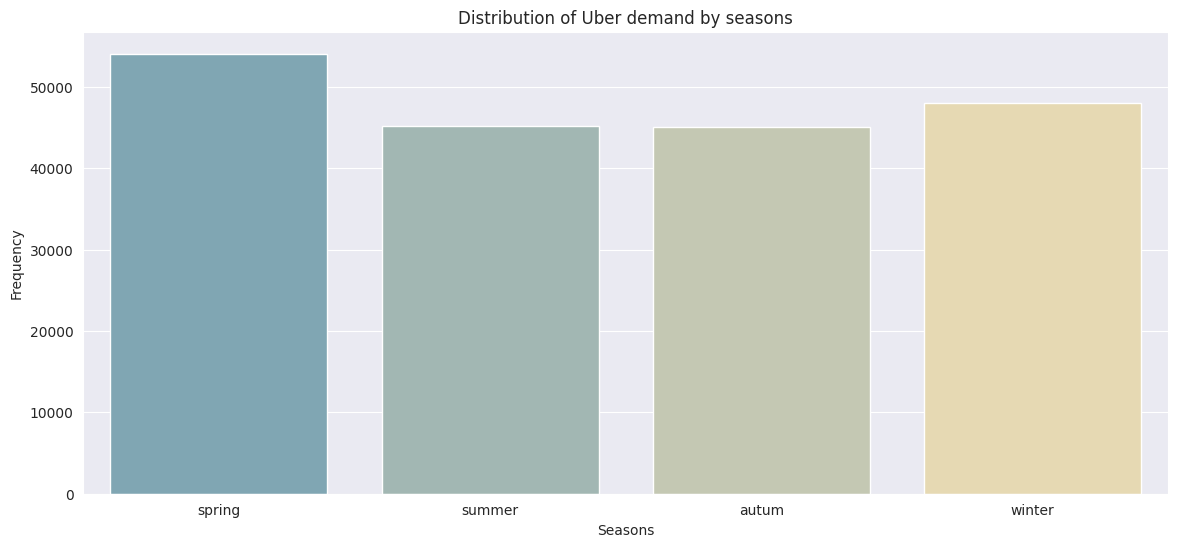

In [35]:
# Plot a histogram to visualize the distribution
season_order = ['spring', 'summer', 'autum', 'winter']
season_counts = (df['season'].value_counts()).reindex(season_order)

plt.figure(figsize=(14,6))
sns.barplot(x=season_counts.index, y=season_counts.values, data=df, palette='blend:#7AB,#EDA')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.title('Distribution of Uber demand by seasons')
plt.xticks(rotation=0)
plt.show();

##### - How do trip distances vary by day of the week?

/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ahow/uber_dataset_analysis/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


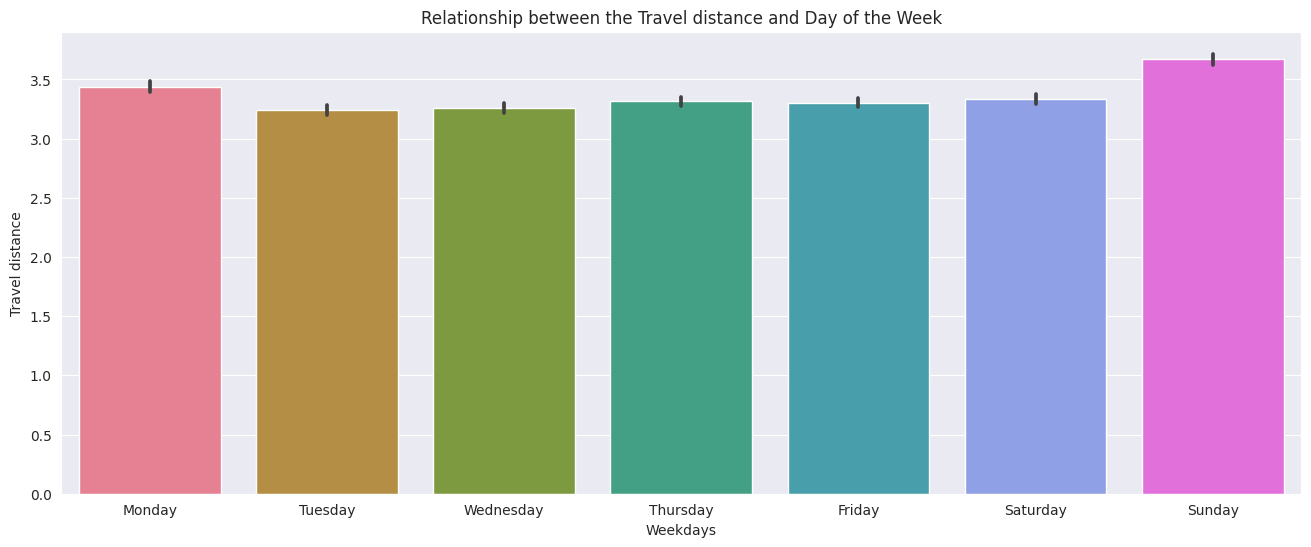

In [36]:
# Bar plot
plt.figure(figsize=(16,6))
sns.barplot(x='weekday', y='distance_km', data=df, palette='husl', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekdays')
plt.ylabel('Travel distance')
plt.title('Relationship between the Travel distance and Day of the Week')
plt.show();

### 4.ANALYSIS OF THE RESULTS

The Data Analysis shows the following

**Key findings**

- The average trip fare is around $10. This is a relatively affordable price, which is likely one of the reasons why Uber is so popular.
- The average trip distance is around 3 Km. This suggests that Uber is primarily used for short trips, such as getting around town or running errands.
- Trip demand is highest on weekends and in the evenings. This is likely due to people going out to socialize, run errands, or travel to and from work.
- Fare amount is increased for trips at 4 and 5 am. This is likely due to the lower supply of drivers available at these times.
- The amount of passengers do not impact the fare amount of the trip. This is likely because Uber uses a dynamic pricing model, which takes into account factors such as supply and demand, time of day, and weather conditions, to determine fares.
- There is a linear relationship between the trip distance and fare amount. This is because Uber charges a base fare, plus a per-mile rate. This linear relationship could be used to model a machine learning algorithm to predict future fares.
- The most popular pickup and drop-off locations are in downtown areas. This is because people are more likely to need transportation in these areas, where there are more businesses, restaurants, and other attractions.
- Trip demand is highest in the morning and evening, and lowest in the afternoon. This is likely due to people traveling to and from work or school in the morning and evening, and running errands or going out to socialize in the afternoon.
- The most popular pickup and drop-off locations are airports, train stations, and business districts. This suggests that Uber is often used for travel between different modes of transportation, and for getting around in busy areas.
- The Uber service is primarily used by one passenger. This is likely because Uber is a relatively affordable transportation option, and it is convenient to have a private car and driver.
- The months with high Uber service demand are March, April, and May (spring season). This is likely due to the improved weather conditions during the spring season, which makes people more likely to go out and about.
- Large distance trips are demanded on Sundays. This is likely due to people traveling on Sundays for leisure or business purposes.

### 5.CONCLUSION

The Uber data analysis shows that Uber is a popular transportation option, especially for short trips and on weekends and in the evenings. The average trip fare is relatively affordable, and the most popular pickup and drop-off locations are in downtown areas. Uber is a convenient and affordable way to get around for many people.

This code has the potential to identify valuable demand patterns in Uber travel data in New York. By analyzing this data, Uber can improve its service by deploying more drivers in areas where demand is high, setting fares that are competitive and reflect the true cost of providing service, and developing new features that meet the needs of its customers.

**Implications for machine learning**

The linear relationship between trip distance and fare amount could be used to train a machine learning algorithm to predict future fares. This algorithm could be used by Uber to set dynamic pricing models, or by riders to estimate the cost of a trip before they book it.

The Uber data could also be used to train machine learning algorithms to predict other things, such as:
- Demand for Uber services in different areas at different times of day.
- The likelihood of a particular driver canceling a ride.
- The risk of traffic congestion on a particular route.

This information could be used by Uber to improve its services and provide a better experience for riders and drivers.
